In [3]:
#FORECASTING - predicting something with respect to time or data
#FORECASTING THE VEGITABLE PRICES
#dataset - https://nhrdf.org/en-us/DailyWiseMarketArrivals
import pandas as pd
df = pd.read_html('DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4180,18/Feb/2022,BANGALORE,7840,1600,1800,1700
4181,22/Feb/2022,BANGALORE,7180,1600,2000,1800
4182,31/May/2022,BANGALORE,7530,2000,2600,2300
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4184 non-null   object
 1   Market                4185 non-null   object
 2   Arrival(q)            4185 non-null   int64 
 3   Price Minimum (Rs/q)  4185 non-null   object
 4   Price Maximum (Rs/q)  4185 non-null   object
 5   Modal Price (Rs/q)    4185 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.3+ KB


In [9]:
df = df.dropna()

In [11]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [17]:
#here for forecasting , we use a library called FB Prophet.
#The input to FB prophet is always a columns(ds,y)
#So we consider Date columns(ds) and modal price(y) column
#now remane the date column as ds and modal price column as y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})


In [19]:
df_new = df[['ds','y']]

df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4179,17/Feb/2022,1500
4180,18/Feb/2022,1700
4181,22/Feb/2022,1800
4182,31/May/2022,2300


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4184 entries, 0 to 4183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4184 non-null   object
 1   y       4184 non-null   object
dtypes: object(2)
memory usage: 98.1+ KB


In [25]:
#the columns dont have proper datatype formant 
# hence we convert the ds column from string to datetime datatype format
#and convert the y column from string to int64 datatype format
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)

C:\Users\chand\AppData\Local\Temp\ipykernel_17256\1023274768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ds'] = pd.to_datetime(df_new['ds'])
C:\Users\chand\AppData\Local\Temp\ipykernel_17256\1023274768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['y'] = df_new['y'].astype(int)


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4184 entries, 0 to 4183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4184 non-null   datetime64[ns]
 1   y       4184 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 81.7 KB


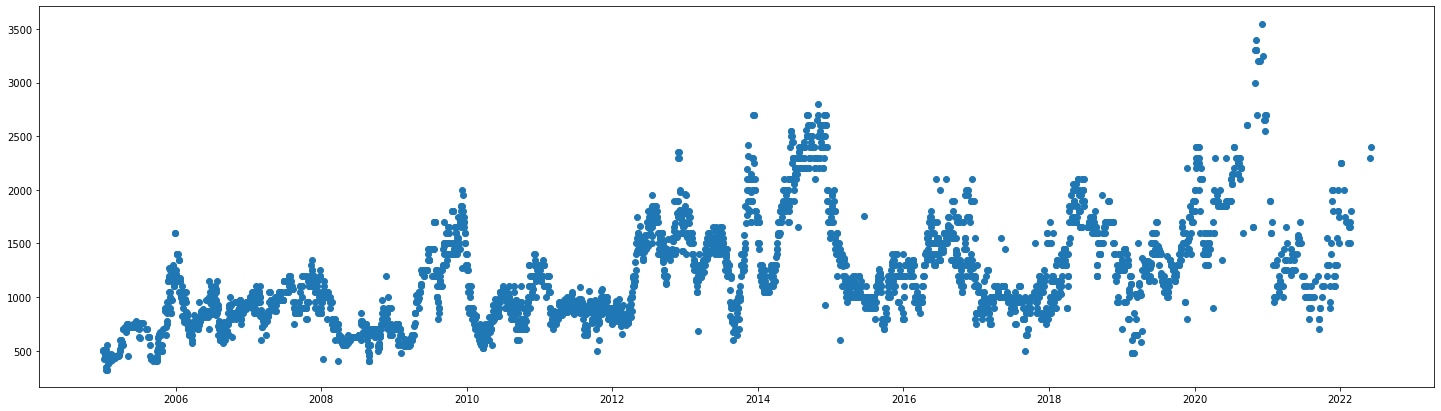

In [27]:
#visualisation 
import matplotlib.pyplot as plt
plt.figure(figsize = (25,7))
plt.scatter(df_new['ds'],df_new['y'])

In [28]:
#FB PROPHET
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'